In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Investigation of Work-Related Injury and Death
## DSCI-235 Final Project
### Nicholas Brady

The Occupational Safety and Health Administration (OSHA) collects work-related injury and illness data from establishments that meet specific industry and employment size specifications through the Injury Tracking Application (ITA). Certain establishments have been required to submit summary data from the OSHA Form 300A since 2016 (1).

In this project, I will explore the data spanning from 2019 to 2023, focusing on which industries report the most injuries and deaths, along with their incident rates. Data was collected from [OSHA's Establishment-Specific Injury and Illness Data page](https://www.osha.gov/Establishment-Specific-Injury-and-Illness-Data).


## Data Exploration and Cleaning

I pulled each year into a data frame and looked at each variable that could be explored. From 2019 to 2023, each column description and type can be found [here](https://www.osha.gov/sites/default/files/ITA_Data_Dictionary.pdf), and for 2024, it can be found [here](https://www.osha.gov/sites/default/files/summary_data_dictionary.pdf). Each of these years includes companies that have submitted a 300A form.

Due to the data being self-reported, I wanted to see what was missing after data import before I continued to develop questions in this dataset.


In [2]:
# Importing each you into its seperate data frame
Osha_2019 = pd.read_csv('CY 2019.csv')
Osha_2020 = pd.read_csv('CY 2020.csv')
Osha_2021 = pd.read_csv('CY 2021 submitted thru 8-29-2022.csv')
Osha_2022 = pd.read_csv('CY 2022.csv', dtype={3: 'str'})
Osha_2023 = pd.read_csv('ITA 300A Summary Data 2023 through 3-16-2024.csv',dtype={3: 'str'})

In [3]:
# Calculate the number of NaN values per column for each DataFrame
nan_count_2019 = Osha_2019.isna().sum()
nan_count_2020 = Osha_2020.isna().sum()
nan_count_2021 = Osha_2021.isna().sum()
nan_count_2022 = Osha_2022.isna().sum()
nan_count_2023 = Osha_2023.isna().sum()

#Combine those data frames togeher 
nan_count_combined = pd.DataFrame({
    'Osha 2019': nan_count_2019,
    'Osha 2020': nan_count_2020,
    'Osha 2021': nan_count_2021,
    'Osha 2022': nan_count_2022,
    'Osha 2023': nan_count_2023
})

#If all the rows are empty ignore output
nan_count_combined = nan_count_combined.loc[:, (nan_count_combined != 0).any(axis=0)]

nan_count_combined

,Osha 2019,Osha 2020,Osha 2021,Osha 2022,Osha 2023
annual_average_employees,0.0,0.0,0.0,0.0,0
change_reason,281454.0,276681.0,303051.0,337305.0,362412
city,16.0,2.0,1.0,1.0,1
company_name,31481.0,29033.0,16747.0,15499.0,18635
created_timestamp,0.0,0.0,0.0,0.0,0
ein,52009.0,31901.0,30355.0,36536.0,39538
establishment_id,0.0,0.0,1.0,0.0,0
establishment_name,2.0,5.0,1.0,1.0,0
establishment_type,2956.0,1879.0,1899.0,1530.0,690
id,0.0,0.0,0.0,0.0,0


## Columns of Interest

There is significant missing data that could be of interest to this report. These are the columns of interest we will be exploring:

- **year_filing_for (Numeric):** The calendar year in which the injuries and illnesses being reported occurred at the establishment.
- **total_deaths (Numeric):** The total number of deaths (Form 300A Field G).
- **total_injuries (Numeric):** The total number of injuries (Form 300A Field M(1)).
- **naics_code (Numeric):** The North American Industry Classification System (NAICS) code for the establishment. Data through 2022 uses a 2012 NAICS code. Data collected in 2023 and later uses a 2012, 2017, or 2022 NAICS code, which can be found [here](https://www.census.gov/naics/).
- **total_dafw_cases (numeric):** The total number of cases with days away from work (Form 300A Field H).
- **total_djtr_cases (numeric):** The total number of cases with job transfer or restriction (Form 300A Field I).

In the 2021 300A some had NA value for year_filing_for, total_deaths, and total_injuries which impacted analysis. I dropped those from the data frame. 


In [4]:
Osha_2021= Osha_2021.dropna(subset=['year_filing_for'])
Osha_2021= Osha_2021.dropna(subset=['total_deaths'])
Osha_2021= Osha_2021.dropna(subset=['total_injuries'])

## Combining Data Frame

After initial data cleaning, we merged the data frames together and converted the year filing to a string for future use in visualizations. With the merger data frames, we have 1,613,228 columns of business reporting data for their business.


In [5]:
Osha_combined = pd.concat([Osha_2019, Osha_2020, Osha_2021, Osha_2022,Osha_2023], ignore_index=True)

Osha_combined['year_filing_for'] = Osha_combined['year_filing_for'].astype(str)

Osha_combined.shape

(1613228, 32)

## Creating 2 Digit NAICS Code

The structure of the NACIS codes is the sector code's first two digits, which is the broadest categorization of economic activity. Each sector is divided into subsections. The report will look at sector codes and he death, injuries, and incident rates.  To be achieve that, I needed to create a new column with only the sector code and verified ther was a two digit number for each. 




In [6]:
def extract_two_digits(code):
    # Convert to string in case it's not
    code_str = str(code)
    # Extract the first two characters (digits)
    return code_str[:2]

Osha_combined['NAICS_2_digit'] = Osha_combined['naics_code'].apply(extract_two_digits)

nan_count_Osha_combined = Osha_combined['NAICS_2_digit'].isna().sum()

nan_count_Osha_combined

0

## Creating Dictionary for the two digit codes 

Creating a dictonary to be able to map the NAICS codes for data analysis later. Confirming if there was any NAICS code that didn't match the dictionary and found less than a percent missing. 

In [7]:
# Creating a dictionary for each NAICS Sector
naics_classification = {
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade',
    '48': 'Transportation and Warehousing',
    '49': 'Transportation and Warehousing',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '53': 'Real Estate and Rental and Leasing',
    '54': 'Professional, Scientific, and Technical Services',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '61': 'Educational Services',
    '62': 'Health Care and Social Assistance',
    '71': 'Arts, Entertainment, and Recreation',
    '72': 'Accommodation and Food Services',
    '81': 'Other Services (except Public Administration)',
    '92': 'Public Administration'   
}

Osha_combined['Classification'] = Osha_combined['NAICS_2_digit'].map(naics_classification)

nan_count_Osha_combined = Osha_combined['Classification'].isna().sum()

nan_count_Osha_combined

1153

In [8]:
# Find rows where the 'Classification' column is NA
missing_classifications = Osha_combined[Osha_combined['Classification'].isna()]

# Get the unique NAICS codes that have missing classifications
missing_naics_codes = missing_classifications['NAICS_2_digit'].unique()

print("NAICS codes with missing classifications:", missing_naics_codes)

NAICS codes with missing classifications: ['43' '63' '77' '35' '39' '50' '80' '34' '99' '24' '19' '87' '29' '16'
 '79' '46' '14' '83' '37' '17' '93' '66' '20' '90' '30' '73' '12' '59'
 '96' '60' '74' '28' '36' '27' '26' '41' '94' '95' '84' '10' '13' '76']


## View of Data Set after cleaning

In [9]:
Osha_combined.head()

,id,company_name,establishment_name,ein,street_address,city,state,zip_code,naics_code,industry_description,...,total_other_illnesses,establishment_id,establishment_type,size,year_filing_for,created_timestamp,change_reason,naics_year,NAICS_2_digit,Classification
0,789908.0,"Bulloch Fertilizer Co., Inc.",Anderson's General Store,NaN,23736 Highway 80 East,Statesboro,GA,30461.0,452990,General stores,...,0.0,272492.0,1.0,2.0,2019.0,1/1/2020 13:43,NaN,NaN,45,Retail Trade
1,789909.0,"Bulloch Fertilizer Co., Inc.","Bulloch Fertilizer Co., Inc.",NaN,205 West Main Street,Statesboro,GA,30458.0,325314,"Fertilizers, mixed, made in plants not manufa...",...,0.0,272486.0,1.0,2.0,2019.0,1/1/2020 13:47,NaN,NaN,32,Manufacturing
2,789910.0,"Guy C. Long, Inc.","Guy C. Long, Inc.",233100096.0,700 East 9th Street,Chester,PA,19013.0,238310,Drywall contractors,...,0.0,541065.0,1.0,1.0,2019.0,1/1/2020 15:38,NaN,NaN,23,Construction
3,789911.0,Oro Hotel LP,Holiday Inn Express & Suites Oroville Lake,NaN,550 Oro Dam Blvd E,Oroville,CA,95965.0,721110,Hotels (except casino hotels),...,0.0,389028.0,1.0,2.0,2019.0,1/1/2020 16:30,NaN,NaN,72,Accommodation and Food Services
4,789912.0,Corn States Metal Fabricators,"Corn States Metal Fabricators, Inc.",NaN,1323 Maple Street,West Des Moines,IA,50265.0,332322,"Ducts, sheet metal, manufacturing",...,0.0,46806.0,1.0,2.0,2019.0,1/1/2020 16:30,NaN,NaN,33,Manufacturing


## Exploration: Is there a trend for reported Injury over time? 

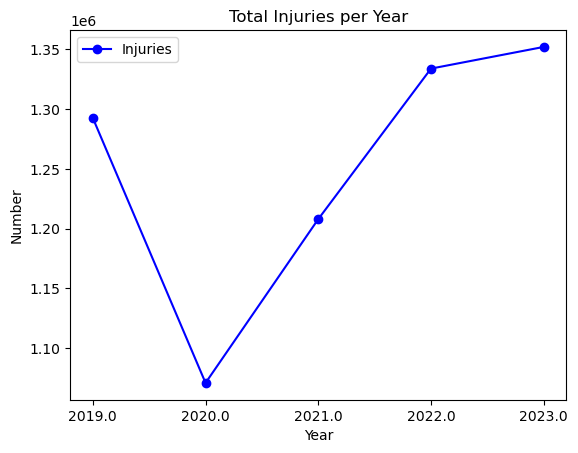

In [10]:
pivot_table = Osha_combined.pivot_table(values=['total_injuries','total_deaths'], index='year_filing_for', aggfunc='sum')

plt.plot(pivot_table.index, pivot_table['total_injuries'], marker='o', label='Injuries', color='blue')  

plt.title('Total Injuries per Year')  
plt.xlabel('Year') 
plt.ylabel('Number')  
plt.legend() 
plt.show()  

## Findings: 

Overall injuries decreased from 2019 - 2020 and steadily increased from 2020 onward.

## Exploration: What specific sectors are contributing to more reported injuries

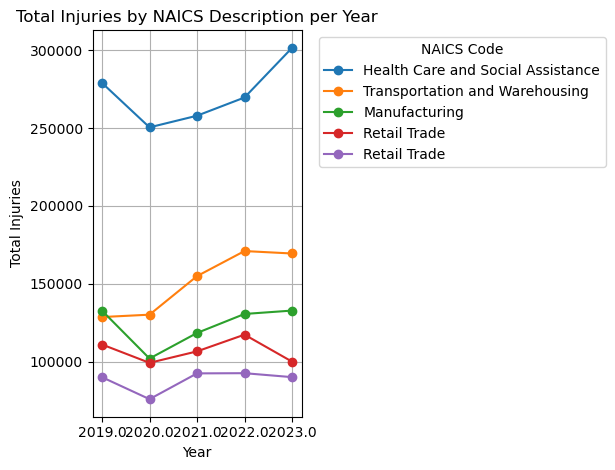

In [11]:
pivot_table_injuries_by_nacis = Osha_combined.pivot_table(values='total_injuries',index='year_filing_for',columns='NAICS_2_digit',aggfunc='sum')

total_injuries_by_naics = pivot_table_injuries_by_nacis.sum().sort_values(ascending=False)

top_5_naics_codes = total_injuries_by_naics.head(5).index

pivot_table_injuries_by_nacis_top5 = pivot_table_injuries_by_nacis[top_5_naics_codes]

for column in pivot_table_injuries_by_nacis_top5.columns:
    plt.plot(pivot_table_injuries_by_nacis_top5.index, pivot_table_injuries_by_nacis_top5[column], marker='o', label=naics_classification[column])

plt.title('Total Injuries by NAICS Description per Year')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.legend(title='NAICS Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  
plt.show()


## Findings: 

For the past 5 years, the top 5 sectors with the most reported Injuries are Health Care, Transportation, and Warehousing, manufacturing, and Retail Trade. 

## Exploration: Is there a trend for reported death over time? 

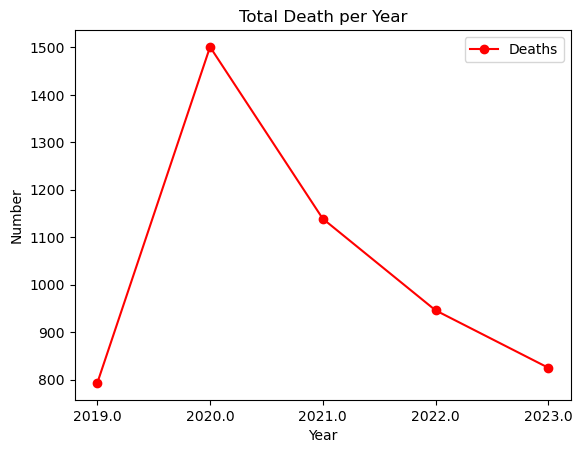

In [12]:
# Plot deaths
plt.plot(pivot_table.index, pivot_table['total_deaths'], marker='o', label='Deaths', color='red')  # Line plot with markers for deaths

plt.title('Total Death per Year')  
plt.xlabel('Year')  
plt.ylabel('Number')  
plt.legend() 
plt.show()  

## Findings: 

Death has a significant increase from 2019 - 2020 and declining year over year

## Exploration: What specific sectors are contributing to more reported deaths

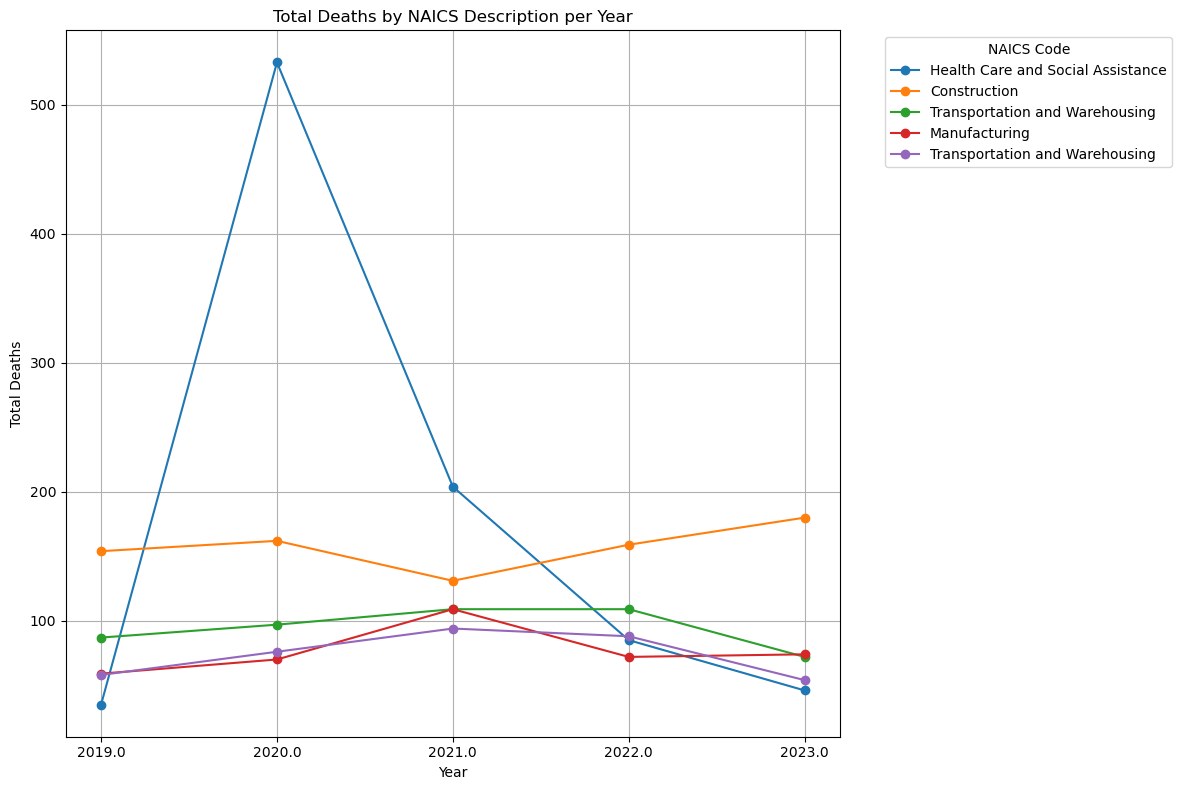

In [13]:
# initial pivot table with total deaths for each NAICS code by year
pivot_table_deaths_by_naics = Osha_combined.pivot_table(
    values='total_deaths',
    index='year_filing_for',
    columns='NAICS_2_digit',
    aggfunc='sum'
)

# Sum all the deaths 
total_deaths_by_naics = pivot_table_deaths_by_naics.sum(axis=0).sort_values(ascending=False)

# Identify the top 5 
top_5_naics_codes = total_deaths_by_naics.head(5).index

# Filter to keep top 5 
pivot_table_deaths_by_naics_top5 = pivot_table_deaths_by_naics[top_5_naics_codes]

# Plotting
plt.figure(figsize=(12, 8))

for column in pivot_table_deaths_by_naics_top5.columns:
    plt.plot(pivot_table_deaths_by_naics_top5.index, pivot_table_deaths_by_naics_top5[column], marker='o', label=naics_classification[column])

plt.title('Total Deaths by NAICS Description per Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='NAICS Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## Findings: 

Health Care from these year time frame is the highest, in 2020 with Constrution in the 2nd highest. 

## Exploration: What about each sectors incident rate. 

An incident rate is the frequency of injuries relative to the number of hours works. 



In [14]:
# Adjust Outsize to fit 
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)  # Adjust column width
pd.set_option('display.max_columns', None)  # Show all columns


# Drop rows where the NAICS code is not matcching NAICS
valid_naics_filter = ~Osha_combined['NAICS_2_digit'].isin(missing_naics_codes)

Osha_combined = Osha_combined[valid_naics_filter ]

# Calculate the incident rate
Osha_combined['incident_rate'] = (Osha_combined['total_dafw_cases'] + Osha_combined['total_djtr_cases']) * 200000 / Osha_combined['total_hours_worked']


grouped_data = Osha_combined.groupby(['year_filing_for', 'NAICS_2_digit'], as_index=False)['incident_rate'].mean()

# Sort by 'year_filing_for' and 'incident_rate' 
grouped_data.sort_values(by=['year_filing_for', 'incident_rate'], ascending=[True, False], inplace=True)

# Get the top 5 incident rates per year
top5_per_year = grouped_data.groupby('year_filing_for').head(5)

top5_per_year.set_index('year_filing_for', inplace=True)


top5_per_year_with_description = top5_per_year.copy()


top5_per_year_with_description['Industry_Name'] = top5_per_year_with_description['NAICS_2_digit'].map(naics_classification)

top5_per_year_with_description

,NAICS_2_digit,incident_rate,Industry_Name
year_filing_for,,,
2019.0,31,32.389969,Manufacturing
2019.0,61,26.578337,Educational Services
2019.0,11,25.953507,"Agriculture, Forestry, Fishing and Hunting"
2019.0,49,7.306216,Transportation and Warehousing
2019.0,92,6.916043,Public Administration
2020.0,51,28.277596,Information
2020.0,49,14.665672,Transportation and Warehousing
2020.0,56,9.188836,Administrative and Support and Waste Management and Remediation Services
2020.0,54,8.367502,"Professional, Scientific, and Technical Services"


## Findings: 

There some spikes in Manufacturing and the Public Sector, Transportation and Warehousing and Agriculture, Forestry, Fishing and Hunting are increasing and deceasing in intervals over the year.